In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import mkl

#mkl.set_num_threads(4)
np.random.seed(1234)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = [16, 9]

In [2]:
# arrange 2D matrices as tiles (takes 4D `examples` tensor with dims: rows x cols x tile_height x tile_width)
def tiles(examples):
    rows_count  = examples.shape[0]
    cols_count = examples.shape[1]
    tile_height = examples.shape[2]
    tile_width = examples.shape[3]
    
    space_between_tiles = 2
    
    num_of_horizontal_pixels = (1 + cols_count) * space_between_tiles + cols_count * tile_width
    num_of_vertical_pixels = (1 + rows_count) * space_between_tiles + rows_count * tile_height
    
    img_matrix = np.empty(shape=(num_of_vertical_pixels, num_of_horizontal_pixels))
    img_matrix.fill(np.nan)
    
    for i in range(examples.shape[0]):
        for j in range(examples.shape[1]):
            start_i = space_between_tiles * (i + 1) + i * tile_height
            start_j = space_between_tiles * (j + 1) + j * tile_width
            
            img_matrix[start_i : start_i + tile_height,
                       start_j : start_j + tile_width]  = examples[i][j]
    
    return img_matrix

## MNIST Dataset

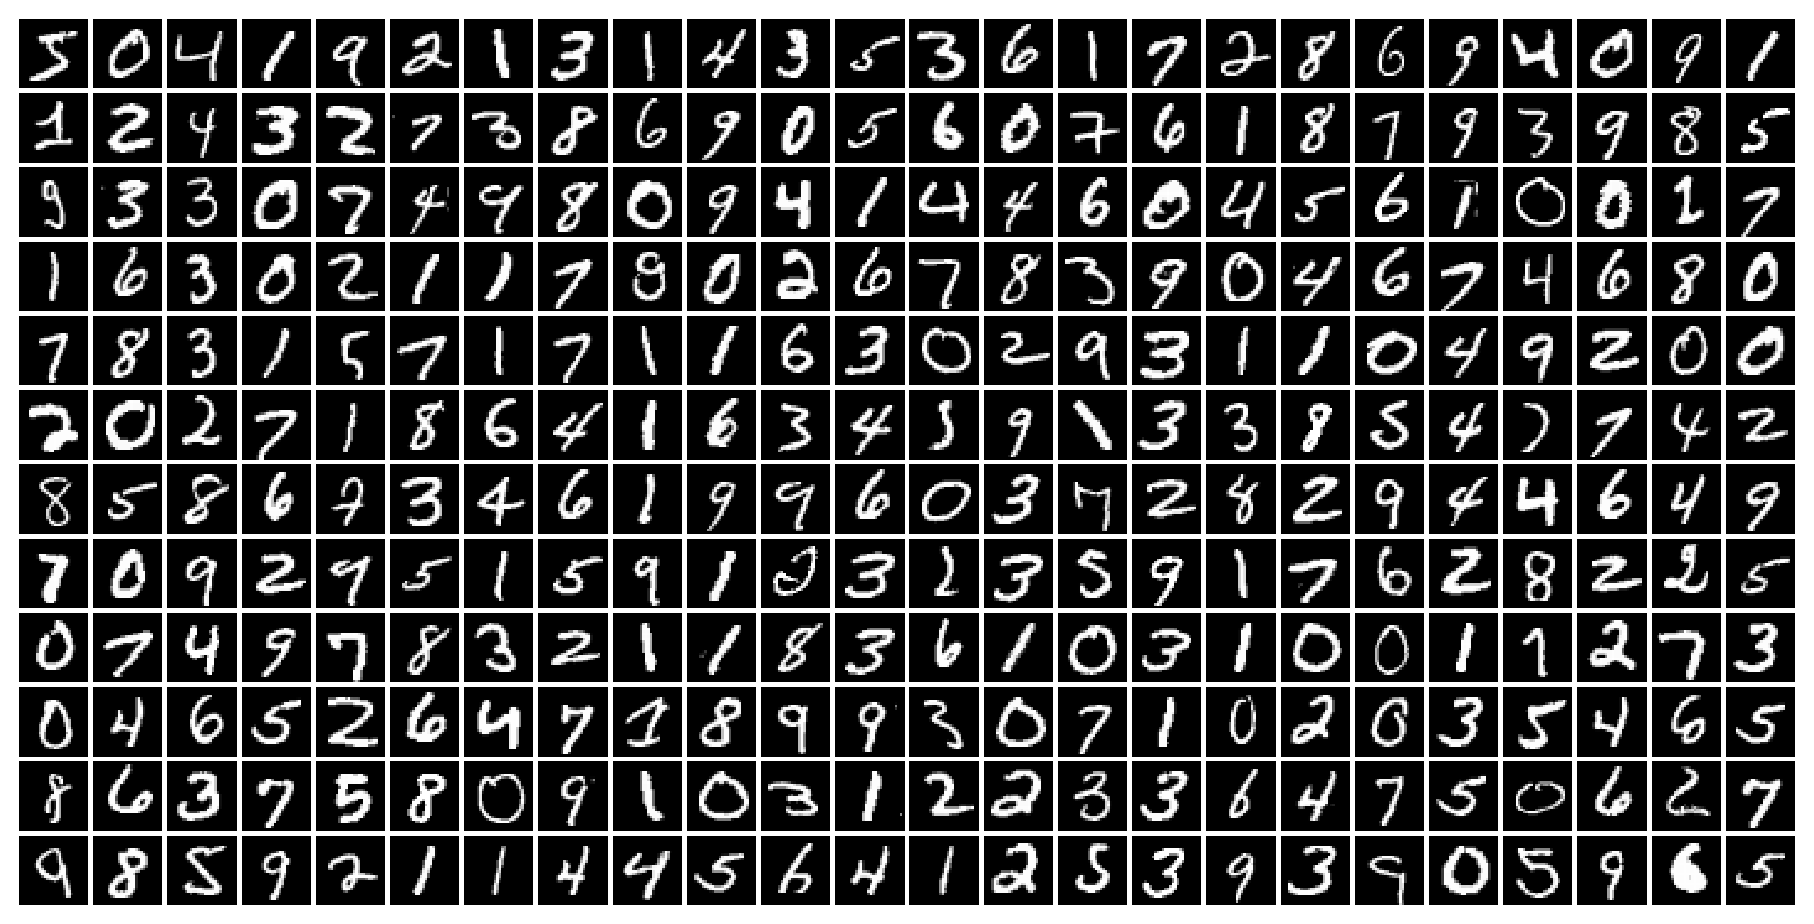

In [3]:
import mnist
digits = np.reshape(mnist.train_images()[:12*24], newshape=(12, 24, 28, 28))
img = tiles(digits)

plt.matshow(img, cmap='gray', interpolation='none')
plt.axis('off')
plt.show()

In [20]:
X = mnist.train_images().astype(np.float32) / 255.0
y = mnist.train_labels()
X.shape

(60000, 28, 28)

Reshape `X` so that the last two dimensions are collapsed into single dimension.

In [24]:
#X = np.asarray(X)
X = X.reshape((-1, 28*28))
X.shape

(60000, 784)

In [ ]:
X.shape

## Visualizing the distribution of MNIST digits

Add a scatter plot to `plot`, which:
* displys the first two dimensions of `X`,
* includes only these elements from `X` for which `y == i` (i.e. elements from the i-th class),
* includes label (i.e. `i`) in the legend.


In [39]:
def plot_2d_mnist_scatter(X, y):
    fig, plot = plt.subplots()
    fig.set_size_inches(16, 16)
    plt.prism()

    for i in range(10):
        digit_indeces = (y == i)
        dim1 = X[digit_indeces, 0]
        dim2 = X[digit_indeces, 1]
        plot.scatter(dim1, dim2, label=str(i))

    plot.set_xticks(())
    plot.set_yticks(())

    plt.tight_layout()
    plt.legend()
    plt.show()

### Principal Component Analysis (PCA)

In [27]:
SAMPLES_LIMIT = 2000
X_small = X[:SAMPLES_LIMIT]
y_small = y[:SAMPLES_LIMIT]

Use PCA function to embed `X_small` in two dimensions. Store the result in `X_pca_embedded`.

In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca_embedded = pca.fit_transform(X_small)

In [34]:
X_pca_embedded.shape

(2000, 2)

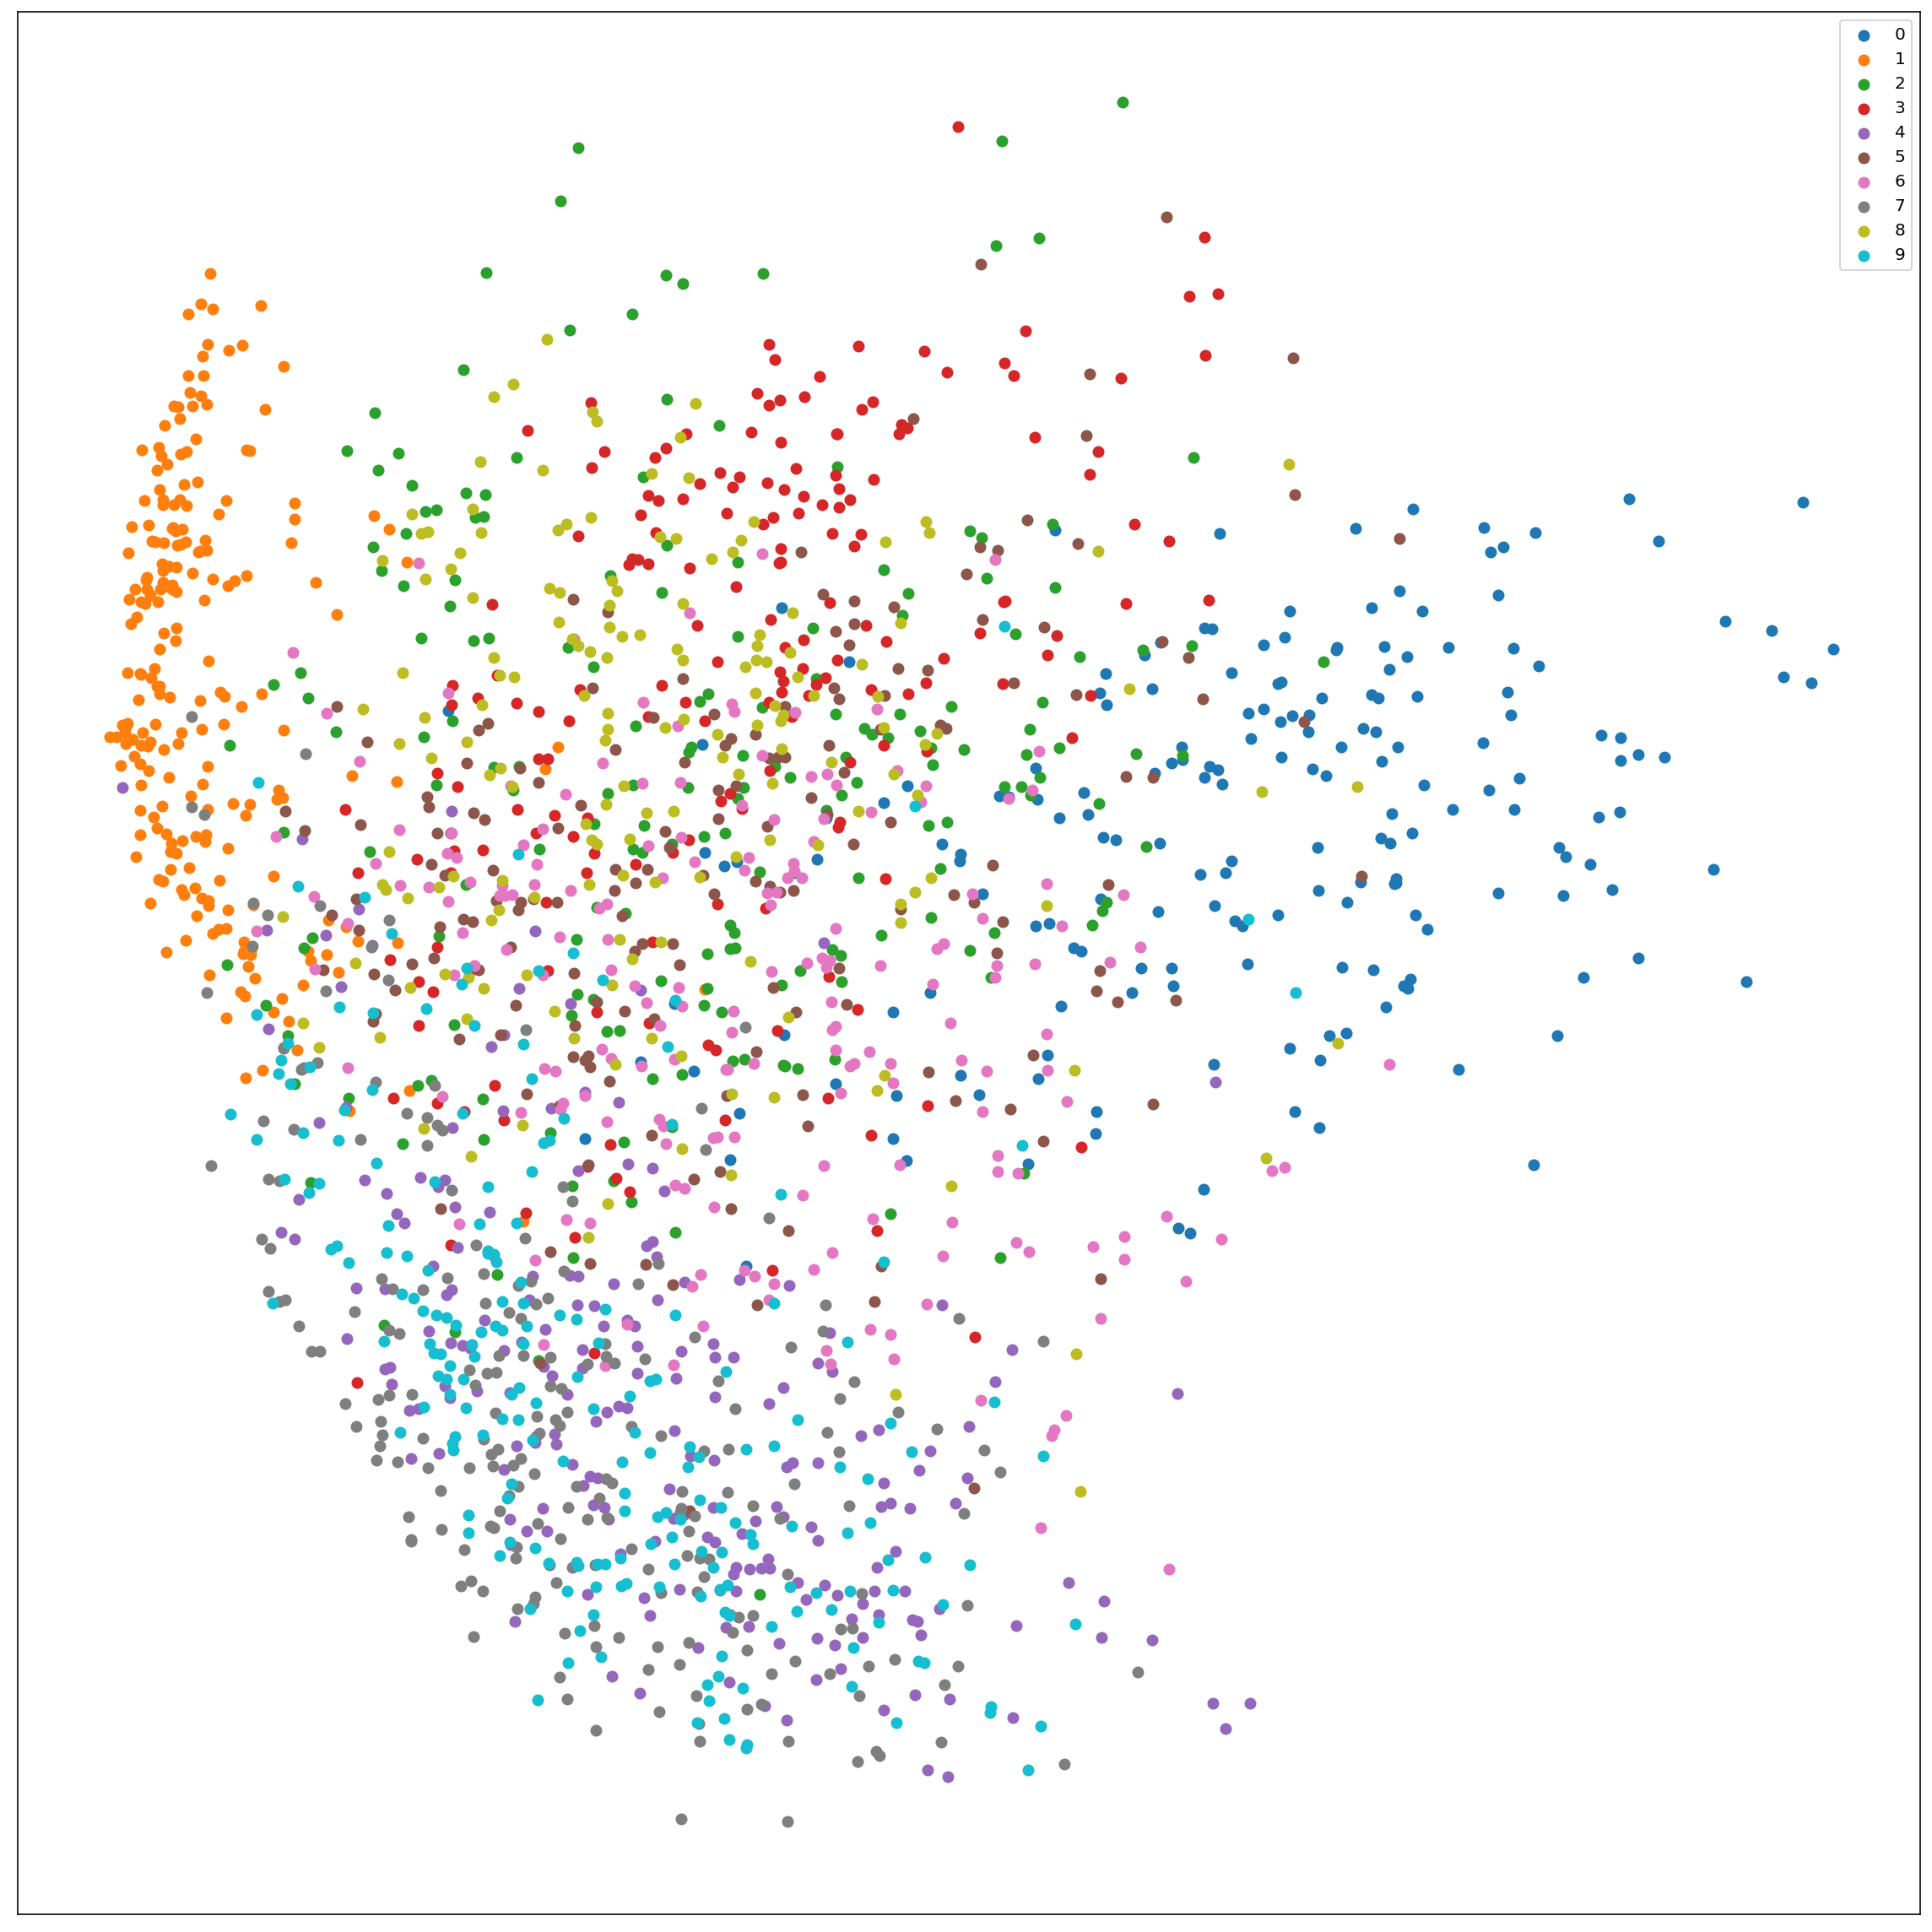

In [40]:
plot_2d_mnist_scatter(X_pca_embedded, y_small)

### T-distributed Stochastic Neighbour Embedding (T-SNE)

Make sure to have a look on this increadible [article on T-SNE](https://distill.pub/2016/misread-tsne/).

Use `T-SNE` function to embed `X_small` in two dimensions. Store the result in `X_tsne_embedded`. <BR>
Use:
 * `n_iter=500` argument to limit the number of T-SNE iterations, 
 * `verbose=2` argument to see a verbose output during embedding.

In [43]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_iter=500, verbose=2)
X_tsne_embedded = tsne.fit_transform(X_small)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.090s...
[t-SNE] Computed neighbors for 2000 samples in 12.636s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 2.528206
[t-SNE] Computed conditional probabilities in 0.221s
[t-SNE] Iteration 50: error = 78.0267487, gradient norm = 0.0049289 (50 iterations in 5.807s)
[t-SNE] Iteration 100: error = 76.2211075, gradient norm = 0.0276940 (50 iterations in 5.099s)
[t-SNE] Iteration 150: error = 75.6746674, gradient norm = 0.0072100 (50 iterations in 4.152s)
[t-SNE] Iteration 200: error = 75.6752167, gradient norm = 0.0105216 (50 iterations in 4.049s)
[t-SNE] Iteration 250: error = 75.6775131, gradient norm = 0.0089971 (50 iterations in 4.141s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.677513
[t-SNE] Iteration 300: error = 1.5038847, gradient norm = 0.0010919 (50 iterations in 4.601s

In [44]:
X_tsne_embedded.shape

(2000, 2)

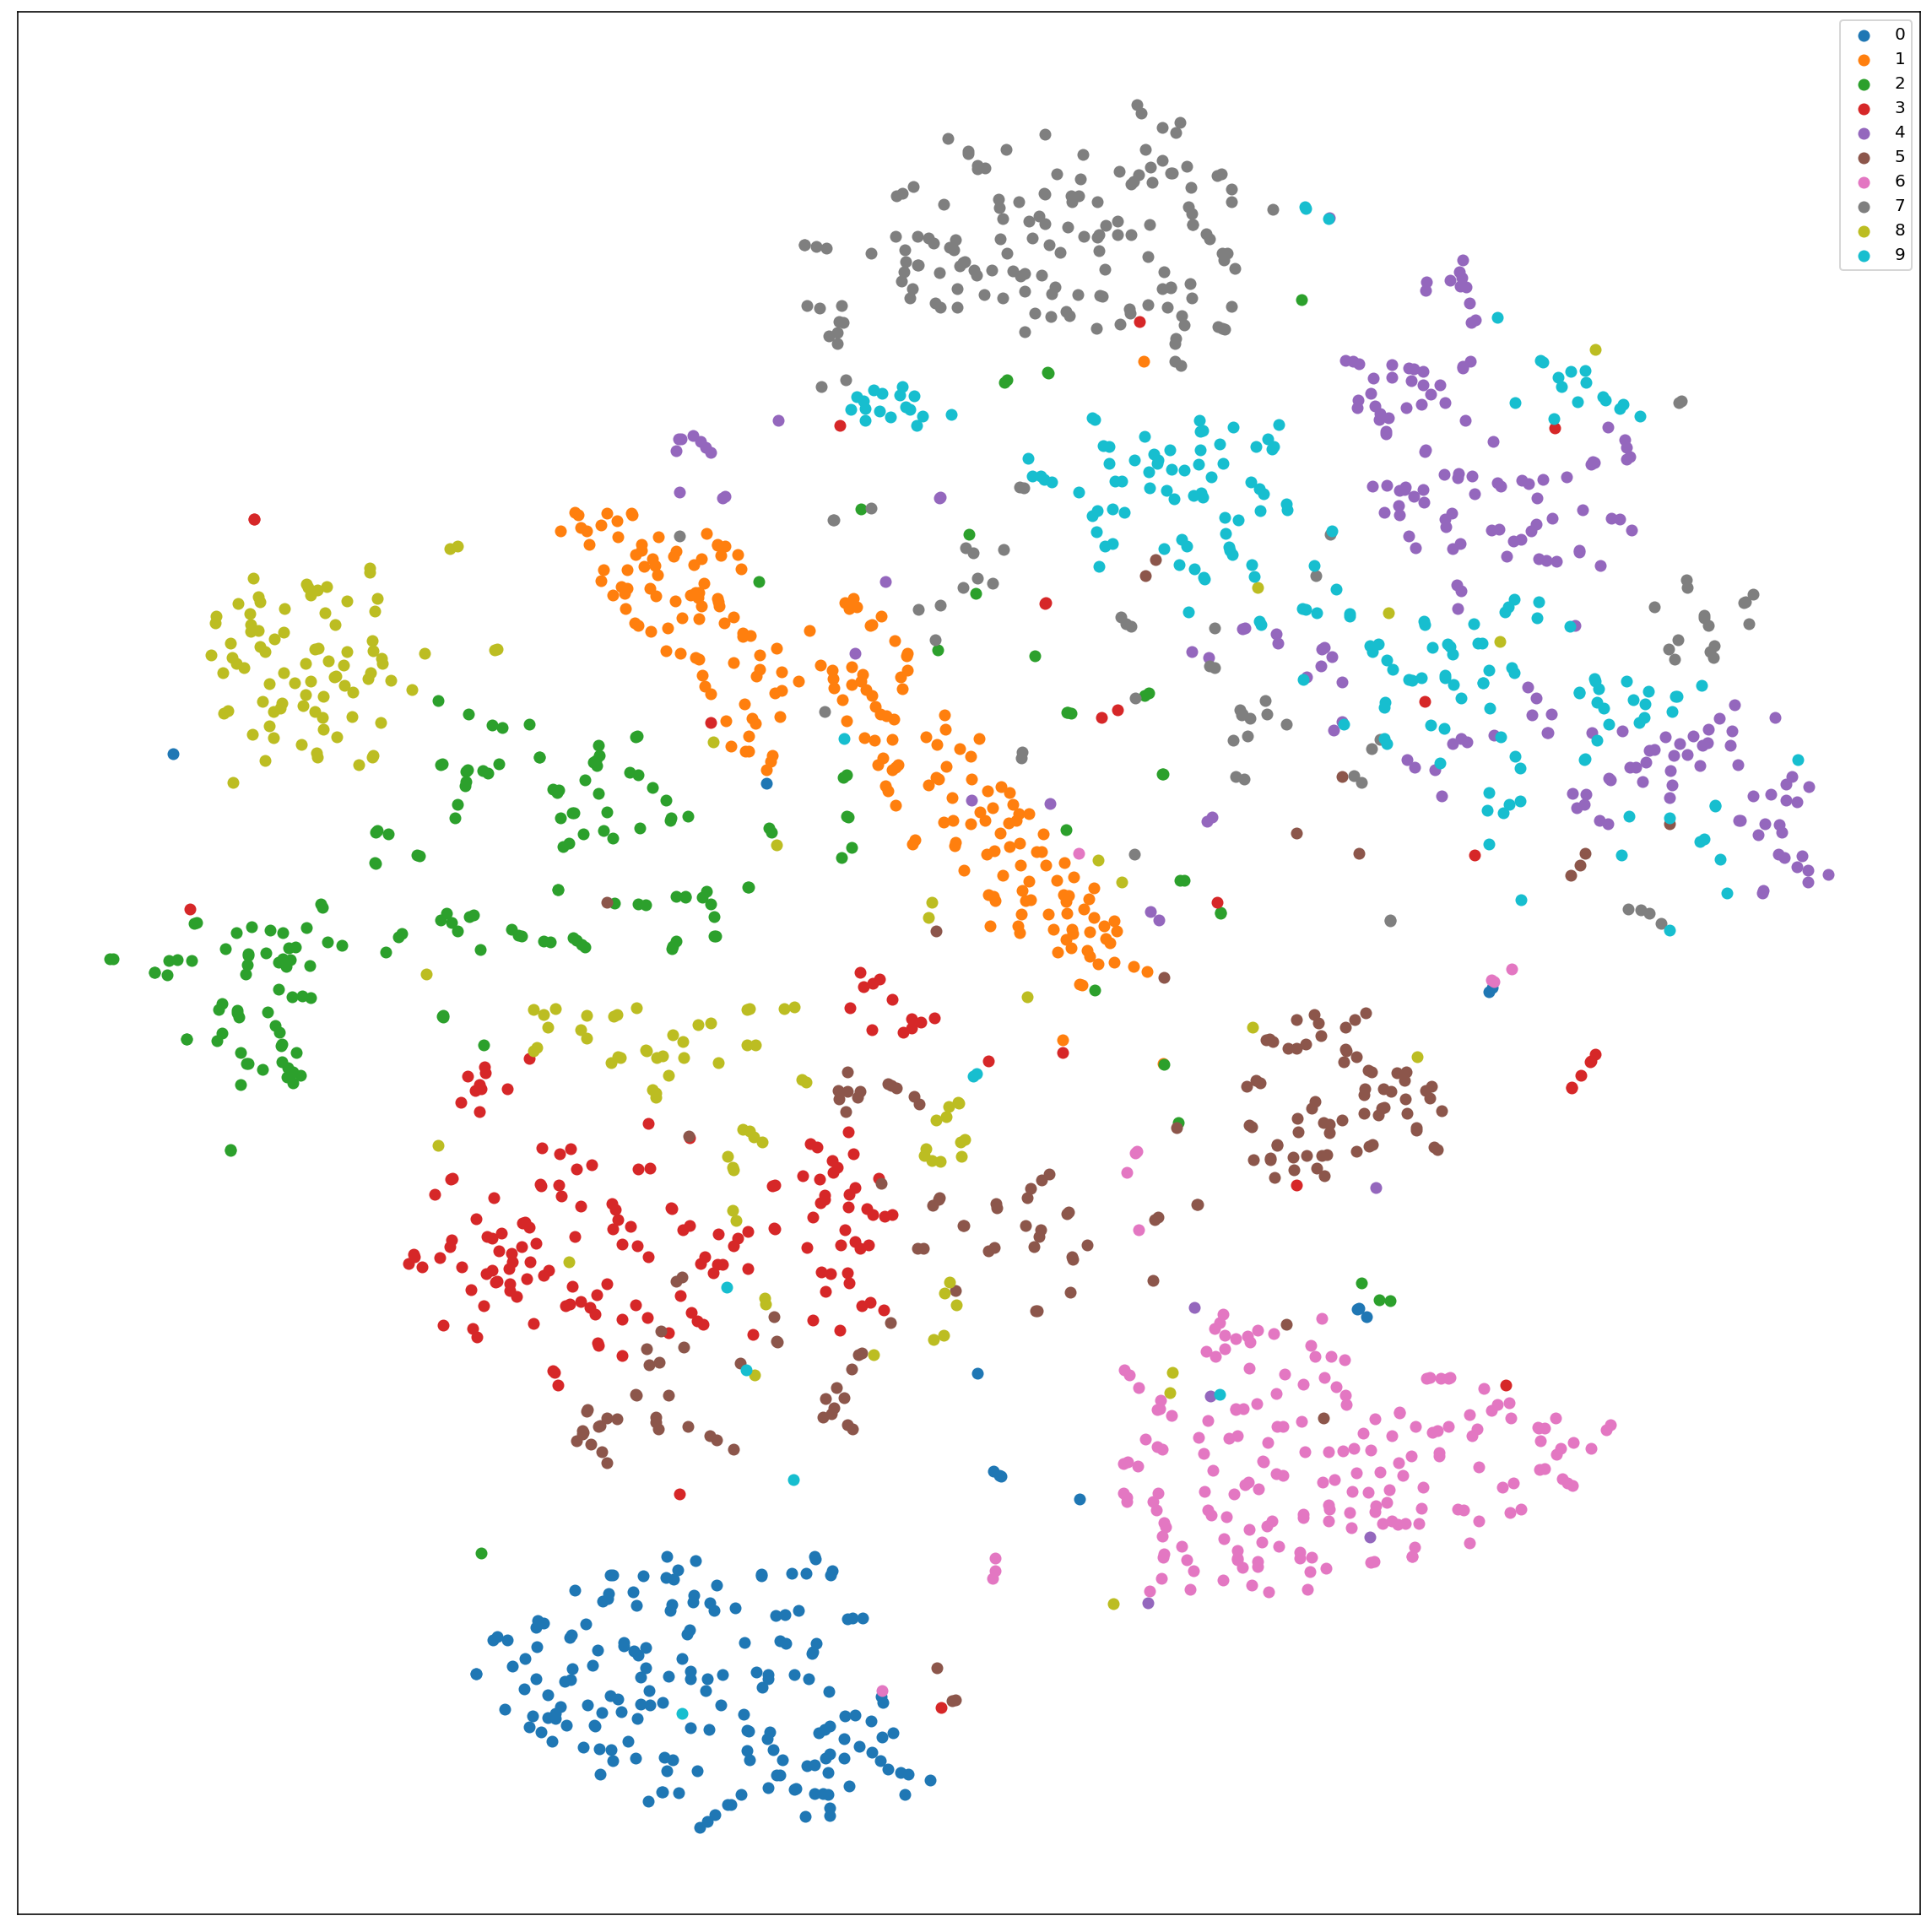

In [45]:
plot_2d_mnist_scatter(X_tsne_embedded, y_small)

### 3D interactive plots with plotly

In [46]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

def plot_3d_mnist_plotly_scatter(X, y):
    def make_trace(i):
        digit_indeces = y == i
        return go.Scatter3d(
            x=X[digit_indeces, 0],
            y=X[digit_indeces, 1],
            z=X[digit_indeces, 2],
            mode='markers',
            name=str(i),
            marker=dict(
                color=i,
                colorscale='Jet',
                size=4,
                symbol='circle',
                line=dict(
                    color='rgb(204, 204, 204)',
                    width=1
                )
            )
        )
        
    traces = [make_trace(i) for i in range(10)]
    
    layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))
    fig = go.Figure(data=traces, layout=layout)
    iplot(fig)

Use PCA function to embed `X_small` in **three** dimensions. Store the result in `X_3d_pca_embedded`.

In [49]:
pca_3 = PCA(n_components=3)
X_3d_pca_embedded = pca_3.fit_transform(X_small)

In [51]:
X_3d_pca_embedded.shape

(2000, 3)

In [52]:
plot_3d_mnist_plotly_scatter(X_3d_pca_embedded, y_small)

In [63]:
tsne_3 = TSNE(n_components=3, n_iter=500, verbose=2)
X_tsne_3_embedded = tsne_3.fit_transform(X_small)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.082s...
[t-SNE] Computed neighbors for 2000 samples in 12.500s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 2.528206
[t-SNE] Computed conditional probabilities in 0.202s
[t-SNE] Iteration 50: error = 82.5737839, gradient norm = 0.3450772 (50 iterations in 13.830s)
[t-SNE] Iteration 100: error = 84.4782715, gradient norm = 0.3170473 (50 iterations in 12.344s)
[t-SNE] Iteration 150: error = 86.5813141, gradient norm = 0.3002758 (50 iterations in 13.404s)
[t-SNE] Iteration 200: error = 88.7121048, gradient norm = 0.2996418 (50 iterations in 12.880s)
[t-SNE] Iteration 250: error = 89.6214294, gradient norm = 0.2964932 (50 iterations in 11.807s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.621429
[t-SNE] Iteration 300: error = 2.0180142, gradient norm = 0.0012969 (50 iterations in 1

In [64]:
plot_3d_mnist_plotly_scatter(X_tsne_3_embedded, y_small)

## Classification task

In [53]:
from sklearn.model_selection import train_test_split
SAMPLES_LIMIT=10000
X_train, X_test, y_train, y_test = train_test_split(X[:SAMPLES_LIMIT], y[:SAMPLES_LIMIT], test_size=0.2)

In [54]:
from sklearn import svm
classifier = svm.SVC(C=1, gamma=0.001)
classifier.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [55]:
from sklearn import metrics

predicted = classifier.predict(X_test)

print("Classification report for classifier {}:\n{}\n".format(
    classifier, metrics.classification_report(y_test, predicted)))

Classification report for classifier SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       184
          1       0.93      0.98      0.95       227
          2       0.92      0.91      0.91       207
          3       0.91      0.88      0.89       217
          4       0.91      0.93      0.92       198
          5       0.89      0.90      0.89       185
          6       0.96      0.96      0.96       200
          7       0.94      0.91      0.92       213
          8       0.90      0.85      0.88       172
          9       0.88      0.90      0.89       197

avg / total       0.92      0.92      0.92      2000




Calculate and display the confision matrix for `predicted` and `y_test` (use metrics package).

In [57]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

print("Confusion matrix:\n{}".format(confusion_matrix))

Confusion matrix:
[[180   0   0   0   0   0   0   1   3   0]
 [  0 222   0   0   0   3   0   0   0   2]
 [  4   2 188   0   4   1   2   1   4   1]
 [  1   5   5 190   0   7   1   2   3   3]
 [  0   2   1   0 185   0   0   2   0   8]
 [  1   0   1   9   0 166   3   0   4   1]
 [  0   0   3   1   1   2 192   0   1   0]
 [  0   4   3   0   4   0   0 194   1   7]
 [  0   3   3   4   3   7   2   0 147   3]
 [  1   1   0   4   6   0   0   7   0 178]]
